### Code to test single-variable LSTM models trained using NASA weather data.

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.models import load_model
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Evaporation Data

In [8]:
# Fix random seed for reproducibility
np.random.seed(7)

def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # Finding the end of the pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        # Checking if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
            
        # Gather input and output parts of pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix: out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

def load_col(txtfile, col, process):
    dataset = pandas.read_csv(txtfile, sep='\t',
                               header=None,usecols=[col])
    if process==True:
        #dataset = dataset.values[2:]
        dataset = dataset.astype('float32')
        scaler = MinMaxScaler(feature_range=(0,1))
        dataset = scaler.fit_transform(dataset)
        return dataset, scaler
    elif process==False:
        return dataset

In [11]:
os.listdir()

['.ipynb_checkpoints',
 'longwave_radiation_flux.txt',
 'nasa_evaporation.h5',
 'nasa_evaporation.slurm',
 'nasa_evaporation_outfile.txt',
 'nasa_lstm_testmodels.ipynb',
 'nasa_radiation.slurm',
 'nasa_singlevar_lstm_1.0.0.py',
 'nasa_temperature.slurm',
 'potential_evaporation.txt',
 'temperature.txt']

In [89]:
# Load data from text file with selected columns, scaled to (0,1)
F = "potential_evaporation.txt"
C = 0
I = 100
O = 100 
data_array, data_scaler = load_col(F, C, True)
#print(data_array[0:10])
n_steps_in = I
n_steps_out = O
dataset = data_array
n_features = 1

print("preparing data...")
X_dataset, y_dataset = split_sequence(data_array, n_steps_in, n_steps_out)
y_dataset = y_dataset.reshape((y_dataset.shape[0], y_dataset.shape[1]))
print("done!")

print("loading model...")
model = load_model("nasa_evaporation.h5")
print("done!")

preparing data...
done!
loading model...
done!


In [90]:
yhat = model.predict(X_dataset)

In [91]:
yhat_1 = []
for i in range(len(dataset) - n_steps_in - n_steps_out + 1):
    yhat_1.append(yhat[i][0])
yhat_1 = np.reshape(yhat_1, (-1,1))
inv_yhat_1 = data_scaler.inverse_transform(yhat_1)

In [95]:
outputfilename = "nasa_evaporation_prediction_full.txt"

output_file = open(outputfilename, "w")

print("Opened txt file")

for i in range(len(inv_yhat_1)):
    #print(i, end='\r')
    entry = str(inv_yhat_1[i][0]) + "\n"
    output_file.write(entry)

print("Closed txt file")

Opened txt file
Closed txt file


In [60]:
yhat_201 = yhat[201]
yhat_201 = yhat_201.reshape(-1,1)

In [61]:
#scaler = MinMaxScaler(feature_range=(0,1)).fit(yhat_201)
inverted = data_scaler.inverse_transform(yhat_201)

In [71]:
outputfilename = "nasa_evaporation_prediction_201_to_300.txt"

output_file = open(outputfilename, "w")

print("Opened txt file")

for i in range(len(inverted)):
    #print(i, end='\r')
    entry = str(inverted[i][0]) + "\n"
    output_file.write(entry)

print("Closed txt file")

Opened txt file
Closed txt file


Radiation Data

In [24]:
# Load data from text file with selected columns, scaled to (0,1)
F = "longwave_radiation_flux.txt"
C = 0
I = 100
O = 100 
data_array, data_scaler = load_col(F, C, True)
#print(data_array[0:10])
n_steps_in = I
n_steps_out = O
dataset = data_array
n_features = 1

print("preparing data...")
X_dataset, y_dataset = split_sequence(data_array, n_steps_in, n_steps_out)
y_dataset = y_dataset.reshape((y_dataset.shape[0], y_dataset.shape[1]))
print("done!")

print("loading model...")
model = load_model("nasa_radiation_laptop.h5")
print("done!")

preparing data...
done!
loading model...
done!


In [25]:
yhat = model.predict(X_dataset)

In [26]:
yhat_201 = yhat[201]
yhat_201 = yhat_201.reshape(-1,1)

In [27]:
#scaler = MinMaxScaler(feature_range=(0,1)).fit(yhat_201)
inverted = data_scaler.inverse_transform(yhat_201)

In [28]:
outputfilename = "nasa_radiation_prediction_201_to_300.txt"

output_file = open(outputfilename, "w")

print("Opened txt file")

for i in range(len(inverted)):
    #print(i, end='\r')
    entry = str(inverted[i][0]) + "\n"
    output_file.write(entry)

print("Closed txt file")

Opened txt file
Closed txt file


In [29]:
yhat_1 = []
for i in range(len(dataset) - n_steps_in - n_steps_out + 1):
    yhat_1.append(yhat[i][0])
yhat_1 = np.reshape(yhat_1, (-1,1))
inv_yhat_1 = data_scaler.inverse_transform(yhat_1)

In [31]:
outputfilename = "nasa_radiation_prediction_full.txt"

output_file = open(outputfilename, "w")

print("Opened txt file")

for i in range(len(inv_yhat_1)):
    #print(i, end='\r')
    entry = str(inv_yhat_1[i][0]) + "\n"
    output_file.write(entry)

print("Closed txt file")

Opened txt file
Closed txt file


Temperature Data

In [15]:
# Fix random seed for reproducibility
np.random.seed(7)

def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # Finding the end of the pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        # Checking if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
            
        # Gather input and output parts of pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix: out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

def load_col(txtfile, col, process):
    dataset = pd.read_csv(txtfile, sep='\t',
                               header=None,usecols=[col])
    if process==True:
        #dataset = dataset.values[2:]
        dataset = dataset.astype('float32')
        scaler = MinMaxScaler(feature_range=(0,1))
        dataset = scaler.fit_transform(dataset)
        return dataset, scaler
    elif process==False:
        return dataset

In [16]:
# Load data from text file with selected columns, scaled to (0,1)
F = "temperature.txt"
C = 0
I = 100
O = 100 
data_array, data_scaler = load_col(F, C, True)
#print(data_array[0:10])
n_steps_in = I
n_steps_out = O
dataset = data_array
n_features = 1

print("preparing data...")
X_dataset, y_dataset = split_sequence(data_array, n_steps_in, n_steps_out)
y_dataset = y_dataset.reshape((y_dataset.shape[0], y_dataset.shape[1]))
print("done!")

print("loading model...")
model = load_model("nasa_temperature_100_100.h5")
print("done!")

preparing data...
done!
loading model...
done!


In [17]:
yhat = model.predict(X_dataset)

In [18]:
yhat_201 = yhat[201]
yhat_201 = yhat_201.reshape(-1,1)
inverted = data_scaler.inverse_transform(yhat_201)

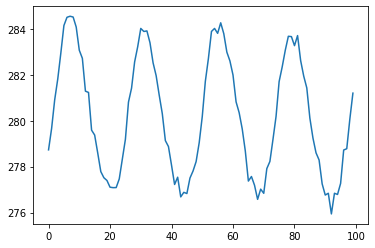

In [19]:
plt.plot(inverted)

In [20]:
outputfilename = "nasa_temperature_100in_100out_prediction_201_to_300.txt"

output_file = open(outputfilename, "w")

print("Opened txt file")

for i in range(len(inverted)):
    #print(i, end='\r')
    entry = str(inverted[i][0]) + "\n"
    output_file.write(entry)

print("Closed txt file")

Opened txt file
Closed txt file


In [21]:
yhat_1 = []
for i in range(len(dataset) - n_steps_in - n_steps_out + 1):
    yhat_1.append(yhat[i][0])
yhat_1 = np.reshape(yhat_1, (-1,1))
inv_yhat_1 = data_scaler.inverse_transform(yhat_1)

In [23]:
outputfilename = "nasa_temperature_prediction_full.txt"

output_file = open(outputfilename, "w")

print("Opened txt file")

for i in range(len(inv_yhat_1)):
    #print(i, end='\r')
    entry = str(inv_yhat_1[i][0]) + "\n"
    output_file.write(entry)

print("Closed txt file")

Opened txt file
Closed txt file
